# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**



In **Part 4**, we will be building a regression model of Butyrylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [132]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [207]:
df = pd.read_csv('Butyrylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**
The ***Butyrylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [208]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3847,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3848,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3849,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [209]:
Y = df.pIC50
Y

0      -2.963788
1      -2.954243
2      -4.698970
3      -3.000000
4      -2.301030
          ...   
3846   -3.746634
3847   -3.615950
3848   -3.708421
3849   -3.986772
3850   -3.518514
Name: pIC50, Length: 3851, dtype: float64

### **3.3. Let's examine the data dimension**

In [210]:
X.shape

(3851, 881)

In [211]:
Y.shape

(3851,)

### **3.4. Remove low variance features**

In [212]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [213]:
X.shape

(3851, 146)

## **4. Data split (80/20 ratio)**

In [214]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [215]:
X_train.shape, Y_train.shape

((3080, 146), (3080,))

In [216]:
X_test.shape, Y_test.shape

((771, 146), (771,))

## **5. Building a Regression Model using Random Forest**

In [222]:
model = RandomForestRegressor(n_estimators=39)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.3124590251095676

In [223]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

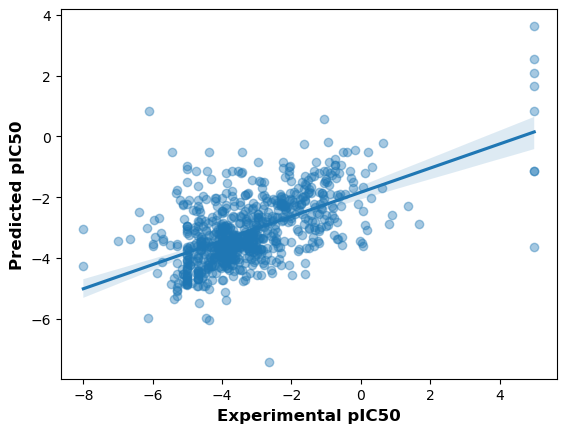

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Y_test and Y_pred are defined
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

# Show the plot
plt.show()
